In [24]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [55]:
experiment_data = pd.read_csv("optimization-experiments.csv")

In [56]:
experiment_data.head()

,Base,Reranker,Optimization,Protected,Metric,Value
0,BPR,None,Original,NaN,NDCG,0.0658
1,BMF,None,Original,NaN,NDCG,0.0325
2,SLIM,None,Original,NaN,NDCG,0.0167
3,RankALS,None,Original,NaN,NDCG,0.0554
4,BPR,FAR,Separate,Loan Bucket 5,NDCG,0.0595


In [57]:
experiment_data['Protected'].fillna('None', inplace=True)

In [58]:
pvt_df = experiment_data.pivot(index=['Base', 'Reranker', 'Optimization', 'Protected'], columns='Metric')['Value']
experiment_data = pvt_df.reset_index()

In [59]:
experiment_data['Alg'] = experiment_data['Base']+"+"+experiment_data['Reranker']

In [61]:
experiment_data.query('Protected == "None"')

Metric,Base,Reranker,Optimization,Protected,NDCG,PSP,Alg
17,BMF,None,Original,None,0.0325,-0.628,BMF+None
43,BPR,None,Original,None,0.0658,-0.828,BPR+None
63,RankALS,FAR,Joint-2%,None,1.0000,2.000,RankALS+FAR
65,RankALS,FAR,Joint-5%,None,1.0000,2.000,RankALS+FAR
69,RankALS,None,Original,None,0.0554,-0.723,RankALS+None
95,SLIM,None,Original,None,0.0167,-0.773,SLIM+None


In [46]:
experiment_data.loc[experiment_data['Optimization']=='Original', 'Alg'] = experiment_data['Base']

In [62]:
exp1_df = experiment_data.query('((Protected == "Loan Bucket 5") | (Protected == "None")) & (Base == "BMF") & \
                    ((Optimization == "Joint") | (Optimization == "Separate") | (Optimization == "Original"))')

#experiment_data[experiment_data['Protected']=='Loan Bucket 5']
#exp2_df = experiment_data[experiment_data['Protected']=='Country']

In [63]:
exp1_df

Metric,Base,Reranker,Optimization,Protected,NDCG,PSP,Alg
1,BMF,FA*IR,Joint,Loan Bucket 5,0.2920,-0.595,BMF+FA*IR
7,BMF,FA*IR,Separate,Loan Bucket 5,0.0341,0.106,BMF+FA*IR
9,BMF,FAR,Joint,Loan Bucket 5,0.0312,-0.202,BMF+FAR
15,BMF,FAR,Separate,Loan Bucket 5,0.0330,0.107,BMF+FAR
17,BMF,None,Original,None,0.0325,-0.628,BMF+None
19,BMF,PFAR,Joint,Loan Bucket 5,1.0000,2.000,BMF+PFAR
25,BMF,PFAR,Separate,Loan Bucket 5,1.0000,2.000,BMF+PFAR


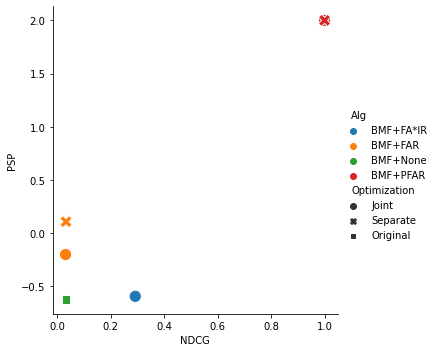

In [64]:
sb.relplot(x="NDCG", y="PSP", hue="Alg", style="Optimization", data=exp1_df, s=150)
plt.savefig('loan_size_scatter.png', facecolor='w', edgecolor='w')